In [1]:
%load_ext autoreload
%autoreload 1

import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import kornia

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T


# Harmless Transforms
%aimport modules
from modules.DataScienceBowl import DataScienceBowl
import modules.Transforms as HT


In [2]:
# Set device to GPU if available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('using cuda')
else:
    torch.device('cpu')
    print('using cpu')
    
# Set seeds
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

using cuda


In [3]:
def visual_transform(img, transform, label=None, figsize=(10,5)):
    
    img_hat = transform(img)
    img_diff = img - img_hat
    img_hat = torch.clamp(img_hat, min=0, max=1)
    img_diff = torch.clamp(img_diff, min=0, max=1)
    
#     print(torch.min(img_hat), torch.max(img_hat))
    
    f, a = plt.subplots(1,3, figsize=figsize)
    a[0].imshow(kornia.tensor_to_image(img), vmin=0, vmax=1)
    a[1].imshow(kornia.tensor_to_image(img_hat), vmin=0, vmax=1)
    a[2].imshow(kornia.tensor_to_image(img_diff))
    f.suptitle(label)
    plt.show()
#     return img_hat

In [4]:
# Define Transforms
# TODO Separate Train and Test transforms
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
#     T.ToTensor()
#     T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [5]:
dataset = DataScienceBowl('data/data_science_train', transform=transform)

dataLoader = DataLoader(dataset, batch_size=1, shuffle=True)

184


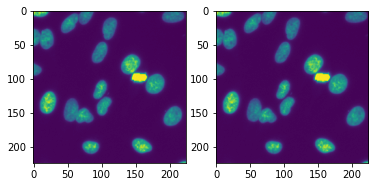

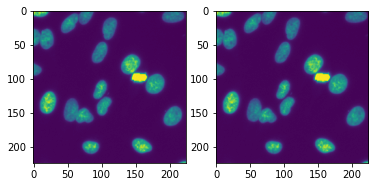

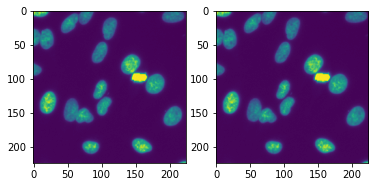

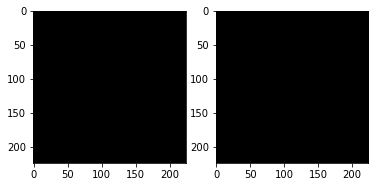

In [8]:
i = int(random.random() * 670)
print(i)
# i = 55
img = dataset[i]['image']/255

img_channels = [img[c,:,:].unsqueeze(0) for c in range(3)]

trnsf = T.Compose([
    T.ColorJitter(brightness=0.5)
])

img_hat_channels = list()

for img_c in img_channels:
    img_c_hat = trnsf(img_c)
    img_hat_channels.append(img_c_hat)
    
    f,a = plt.subplots(1,2)
    a[0].imshow(img_c.permute(1,2,0))
    a[1].imshow(img_c_hat.permute(1,2,0))
    plt.show()
    
    


img_hat = torch.cat(img_hat_channels, 0)

img_hat.shape

# visual_transform()
f,a = plt.subplots(1,2)
a[0].imshow(img.permute(1,2,0))
a[1].imshow(img_hat.permute(1,2,0))
plt.show()

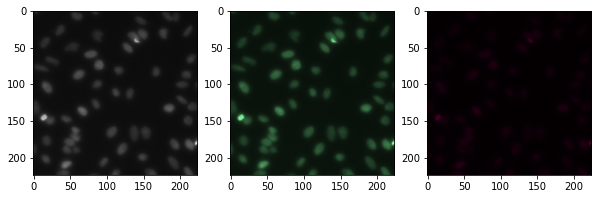

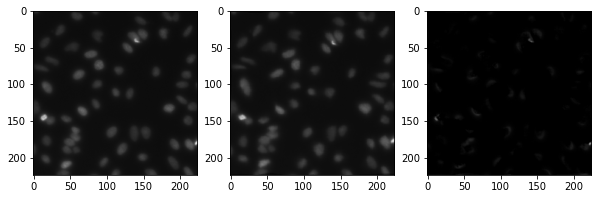

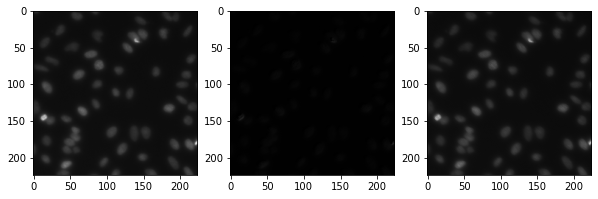

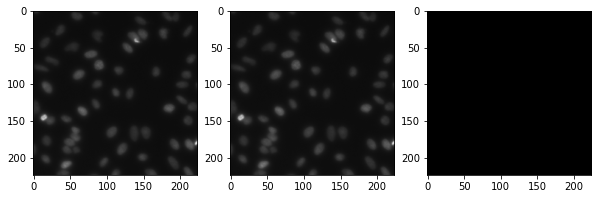

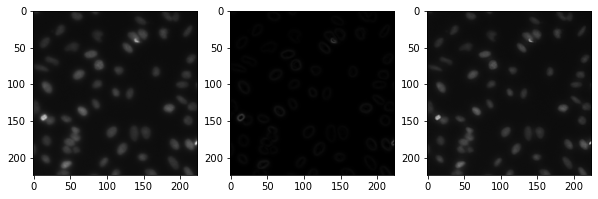

In [39]:
i = int(random.random() * 200)
# i = 55
img = dataset[i]['image']
img = img.to(device)
# img = dataLoader['image'].to(device)

img = img.unsqueeze(0)

noise = torch.rand(1, 2, 224, 224, requires_grad=True)

Ts = [HT.ColorJitter(hue=0.5, channelwise_hue=True), HT.ElasticTransform(), HT.RandomConvolution(kernel_size=(2,2),min=-0.5, max=0.5),  HT.Noise(0, 0.1), HT.Sobel()]

# print(Ts[3].random_kernel)

for t in Ts:
    visual_transform(img, t)


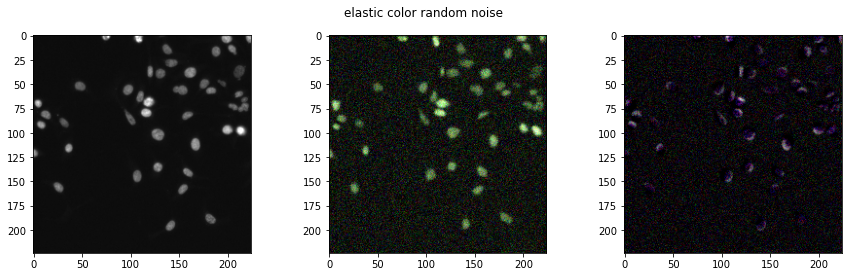

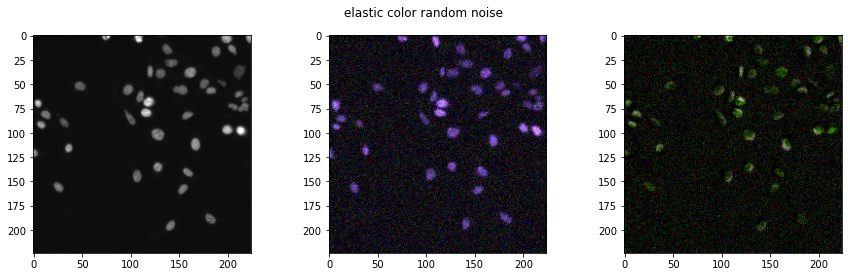

In [44]:
i = int(random.random() * 200)
# i = 55
img = dataset[i]['image'].to(device)
img = img.unsqueeze(0)


transform_options = {
    'elastic': HT.ElasticTransform(),
    'color': HT.ColorJitter(hue=0.5, channelwise_hue=True),
    'random': HT.RandomConvolution(kernel_size=(2,2),min=-0.5, max=0.5),  
    'noise': HT.Noise(0, 0.1),
    'sobel': HT.Sobel(),
}

def compose_transform(transform_list):
    return T.Compose([transform_options[name] for name in transform_list])


combinations = [
    ['elastic', 'color', 'random', 'noise'],
    ['elastic', 'color', 'noise'],
    ['color', 'random', 'noise'],
    ['elastic', 'color', 'sobel', 'noise'],
    ['sobel', 'color', 'elastic', 'noise'],
]

for combi in combinations:
    visual_transform(img, compose_transform(combi), label=' '.join(combi), figsize=(15,4))
    visual_transform(img, compose_transform(combi), label=' '.join(combi), figsize=(15,4))
    break

In [10]:
i = int(random.random() * 200)
print(i)

img = torch.zeros((224, 224))
img[::10, ::10] = 1
img = img.unsqueeze(0)
img = img.repeat(3,1,1)
img = img.unsqueeze(0)
# print(img.shape)

X_val = np.random.rand(1, 3, 200, 300)
X = torch.tensor(X_val, requires_grad=True)

# dY_val = numpy.random.rand(200, 300)


# plt.imshow(kornia.tensor_to_image(img))


displacement_val = np.random.randn(4, 1, 3, 3) * 5
displacement = torch.tensor(displacement_val)

etorch.deform_grid(X, displacement, order=3)


# noise = torch.zeros(1, 2, 224, 224)
# # sigma = torch.tensor([4., 4.])
# alpha = torch.tensor([32., 32.])
# t = HT.ElasticTransform(noise, (3,3), sigma, alpha, align_corners=True)
# img_hat = visual_transform(img, t)
# # img_hat.mean().backward()

# print(img_hat)

147


NameError: name 'etorch' is not defined

In [11]:
import elasticdeform.torch as etorch

X = np.zeros((200, 300))
X[::10, ::10] = 1

img_hat = elasticdeform.deform_random_grid(X, sigma=25, points=3)


f,a = plt.subplots(1,2)

a[0].imshow(X)
a[1].imshow(img_hat)


NameError: name 'elasticdeform' is not defined

In [12]:
max = 1
min = -1

numbers = (max - min) * torch.rand((5,5)) + min
normalized = numbers / torch.sum(numbers)
print(numbers,'\n', normalized)
print(torch.mean(numbers))
print(torch.mean(normalized))



tensor([[-0.8996, -0.8195, -0.9665,  0.6783,  0.6819],
        [-0.4167,  0.0649, -0.0773,  0.5398, -0.6071],
        [ 0.3778,  0.0602,  0.2094, -0.3949,  0.6622],
        [-0.2737, -0.0096,  0.5259,  0.3979, -0.9340],
        [ 0.5414, -0.6835,  0.4592, -0.7811,  0.7956]]) 
 tensor([[ 1.0353,  0.9432,  1.1123, -0.7807, -0.7848],
        [ 0.4795, -0.0747,  0.0890, -0.6212,  0.6987],
        [-0.4348, -0.0693, -0.2410,  0.4544, -0.7621],
        [ 0.3150,  0.0111, -0.6052, -0.4580,  1.0750],
        [-0.6231,  0.7866, -0.5285,  0.8989, -0.9157]])
tensor(-0.0348)
tensor(0.0400)


In [ ]:
torch.unique(img_hat)